##### 킬링 곡선(Keeling Curve)

```
https://towardsdatascience.com/getting-started-with-facebook-prophet-20eccb25b06b
https://git.io/JYG6T
```

대기 중 CO₂를 직접 측정한 가장 긴 기록은 1958년 3월 스크립스 해양학 연구소의 Charles David Keeling에 의해 시작되었습니다. 1961년에 Keeling은 지금까지 수집한 데이터를 발표하여 CO₂가 계절적 변화에 강하고 꾸준히 증가하고 있음을 확인했습니다. 이 추세는 나중에 Keeling Curve로 알려지게 됩니다.

In [1]:
import pandas as pd
from prophet import Prophet
from matplotlib import pyplot

이 데이터 세트에는 53년 동안 19,000개 이상의 일일 관찰이 포함되어 있습니다.

In [2]:
df = pd.read_csv('../examples/co2-ppm-daily.csv')
df.head()

,date,value
0,1958-03-30,316.16
1,1958-03-31,316.40
2,1958-04-02,317.67
3,1958-04-03,317.76
4,1958-04-04,317.09


전처리 과정으로 date, value 컬럼을 ds, y 컬럼으로 변경한다.

In [3]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1958-03-30,316.16
1,1958-03-31,316.40
2,1958-04-02,317.67
3,1958-04-03,317.76
4,1958-04-04,317.09


데이터를 학습합니다.

In [4]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -7.2003


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        112156   0.000655603       66243.2           1           1      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        113688    0.00127486       94200.7           1           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        113991    0.00127276        361975     0.07588           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        114414    0.00196257       90195.3           1           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        114686     0.0063544        381471           1           1      574   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

향후 10년 동안의 CO₂ 농도(PPM)에 대해 예측합니다.

In [5]:
future = m.make_future_dataframe(periods=365 * 10)
forecast = m.predict(future)

향후 10년 동안의 CO₂ 농도(PPM)에 대한 예측 데이터를 그래프로 출력합니다.

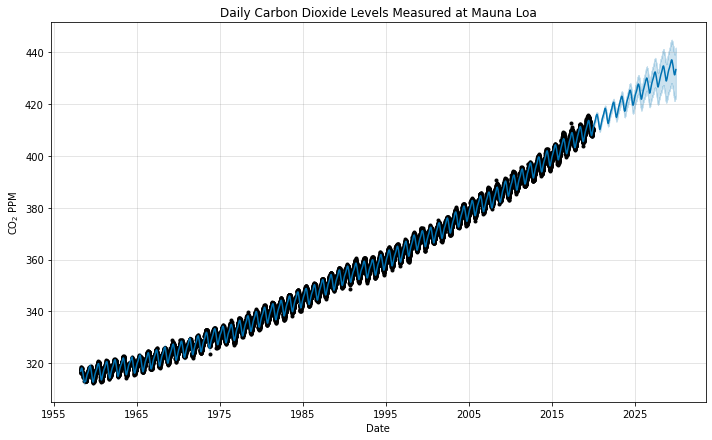

In [6]:
fig1 = m.plot(forecast, xlabel='Date', ylabel=r'CO$_2$ PPM')
pyplot.title('Daily Carbon Dioxide Levels Measured at Mauna Loa')
pyplot.show()

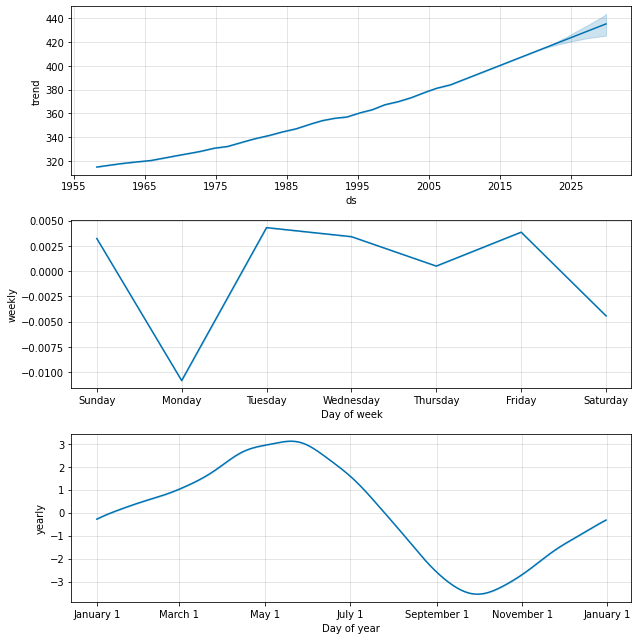

In [7]:
fig2 = m.plot_components(forecast)